# Kiva Crowdfunding - Machine Learning Project

#### Authors: Jonathan Byrne, Liam Byrne, Matthew Boyd

## 1.) Big Picture

Problem statement from Kiva: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding
    
    
Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

... 

Kiva has provided a dataset of loans issued over the last two years, and participants are invited to use this data as well as source external public datasets to help Kiva build models for assessing borrower welfare levels.

...

A good solution would connect the features of each loan or product to one of several poverty mapping datasets, which indicate the average level of welfare in a region on as granular a level as possible. Many datasets indicate the poverty rate in a given area, with varying levels of granularity. Kiva would like to be able to disaggregate these regional averages by gender, sector, or borrowing behavior in order to estimate a Kiva borrower’s level of welfare using all of the relevant information about them. Strong submissions will attempt to map vaguely described locations to more accurate geocodes.

Kernels submitted will be evaluated based on the following criteria:

1. Localization - How well does a submission account for highly localized borrower situations? Leveraging a variety of external datasets and successfully building them into a single submission will be crucial.

2. Execution - Submissions should be efficiently built and clearly explained so that Kiva’s team can readily employ them in their impact calculations.

3. Ingenuity - While there are many best practices to learn from in the field, there is no one way of using data to assess welfare levels. It’s a challenging, nuanced field and participants should experiment with new methods and diverse datasets.

## 2.) Planning Our Approach 

### welfare = (health + wealth + happiness) / 3

-------------------

##### How do you define or calculate welfare? 

By aggregating the research from a University of Chicago Law School research paper titled 'Welfare as Happiness'[1] as well as the research done by The World Bank entitled 'Health, Wealth, and Welfare'[2], our unique formula for calculating welfare scores by region involved averaging health, wealth, and happiness scores from that same region. 


##### Where does machine learning come into play? 
To generate health, wealth, and happiness scores we need to import outside databases related to each of these sectors, and then develop machine learning models on each of these datasets to accurately predict these scores. 


##### Why is our solution important? 
By aggregating outside datasets concerned with helath, wealth, and happiness, we are able to provide a very robust solution to accurately measure welfare scores, as well as reach a level a granularity sufficient for Kiva to use. 



-----------------------------------------------



[1] Welfare As Happiness: https://chicagounbound.uchicago.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1613&context=law_and_economics

[2] Health, Wealth, and Welfare: http://web.worldbank.org/archive/website01055/WEB/IMAGES/BLOOM.PDF

## 3.) Exploring the Kiva dataset 

Let's first import the Kiva dataset, clean our data, and try to find the best way to approach this problem and develop our solution

In [52]:
#importing the dataset
import pandas as pd

kiva = pd.read_csv("kiva_loans.csv")
happiness = pd.read_csv("2015.csv")
health = pd.read_csv("Life-Expectancy-Data.csv")
wealth = pd.read_csv("2015.csv")
kiva.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


At first glance it looks like we will be able to aggregate outside datasets by combining 'country', 'region', 'sector', and 'gender' information

## 4.) Happiness Score 

In [2]:
happiness["Happy_Countrys"] = (happiness["Happiness Score"] > 5)
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happy_Countrys
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,True
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,True
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,True
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,True
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,True


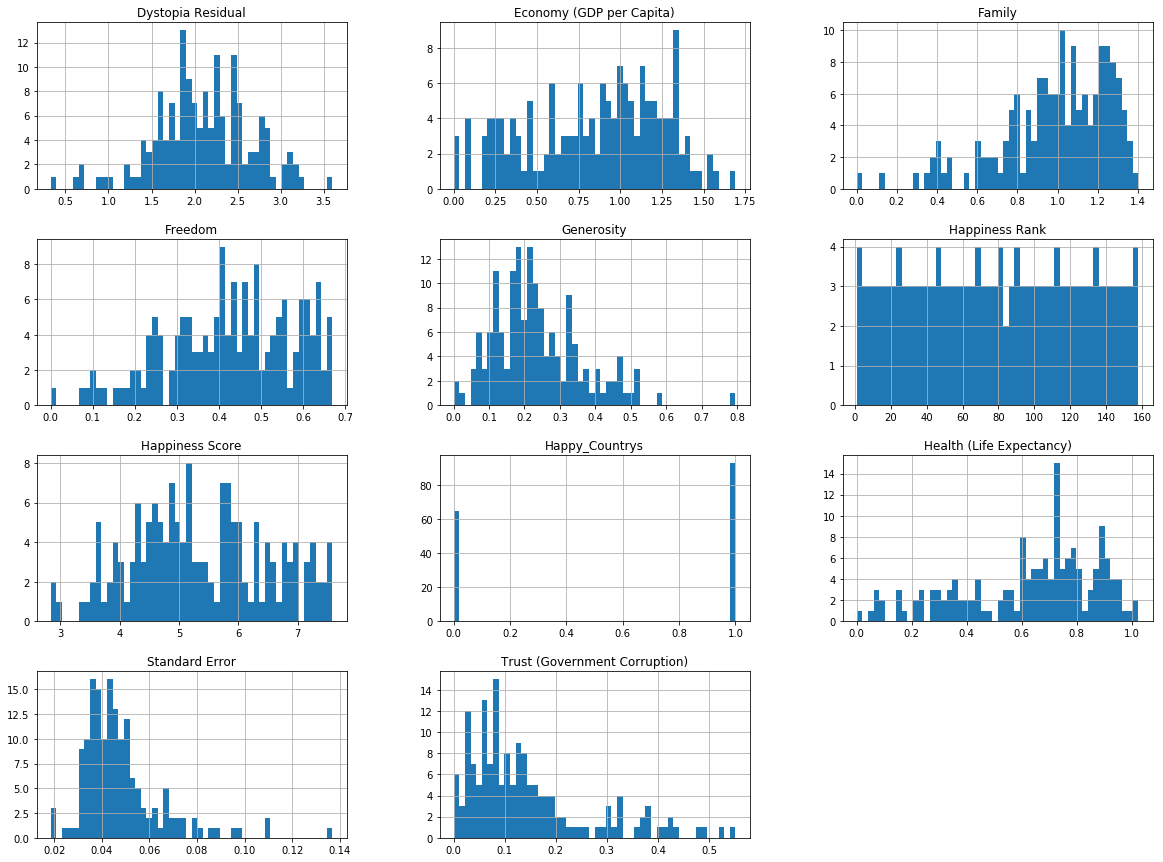

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
happiness.hist(bins=50, figsize=(20,15))
plt.show()

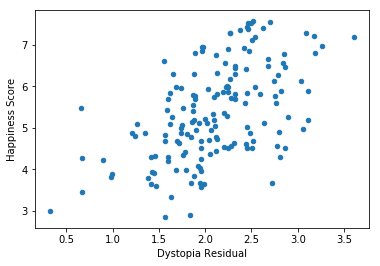

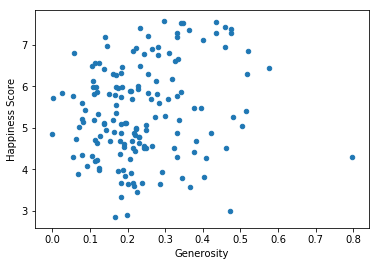

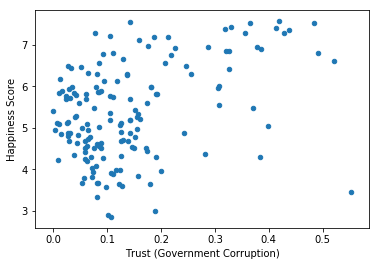

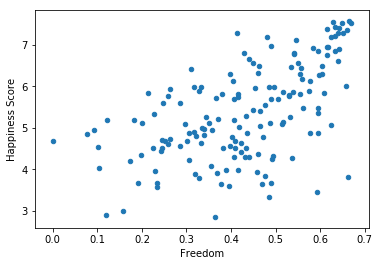

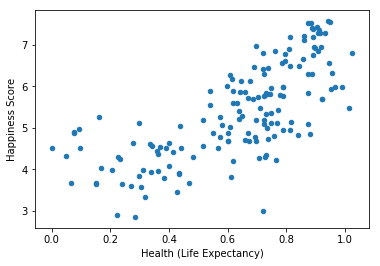

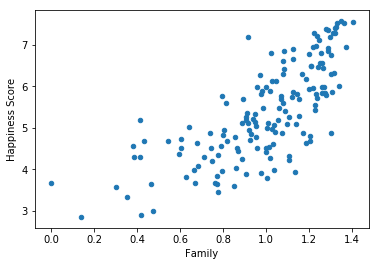

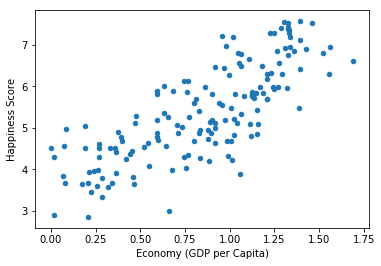

In [4]:
happiness.plot(kind="scatter", x="Dystopia Residual", y="Happiness Score")
happiness.plot(kind="scatter", x="Generosity", y="Happiness Score")
happiness.plot(kind="scatter", x="Trust (Government Corruption)", y="Happiness Score")
happiness.plot(kind="scatter", x="Freedom", y="Happiness Score")
happiness.plot(kind="scatter", x="Health (Life Expectancy)", y="Happiness Score")
happiness.plot(kind="scatter", x="Family", y="Happiness Score")
happiness.plot(kind="scatter", x="Economy (GDP per Capita)", y="Happiness Score")

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Health (Life Expectancy)", "Economy (GDP per Capita)"])),
        ("imputer", Imputer(strategy="median")),
    ])
X = num_pipeline.fit_transform(happiness)
X

array([[ 0.94143,  1.39651],
       [ 0.94784,  1.30232],
       [ 0.87464,  1.32548],
       [ 0.88521,  1.459  ],
       [ 0.90563,  1.32629],
       [ 0.88911,  1.29025],
       [ 0.89284,  1.32944],
       [ 0.91087,  1.33171],
       [ 0.90837,  1.25018],
       [ 0.93156,  1.33358],
       [ 0.91387,  1.22857],
       [ 0.86027,  0.95578],
       [ 0.89042,  1.33723],
       [ 0.81444,  1.02054],
       [ 0.86179,  1.39451],
       [ 0.69702,  0.98124],
       [ 0.91894,  1.56391],
       [ 0.89533,  1.33596],
       [ 0.89667,  1.30782],
       [ 0.80925,  1.42727],
       [ 0.90943,  1.26637],
       [ 0.76276,  1.36011],
       [ 0.72052,  1.04424],
       [ 1.02525,  1.52186],
       [ 0.79661,  1.06353],
       [ 0.89186,  1.32792],
       [ 0.85857,  1.10715],
       [ 0.79733,  1.69042],
       [ 0.94579,  1.27778],
       [ 0.78723,  1.05351],
       [ 0.84483,  1.17898],
       [ 0.8116 ,  1.06166],
       [ 0.69077,  0.91861],
       [ 0.7385 ,  0.9669 ],
       [ 0.720

Now lets build our model

In [6]:
from sklearn.svm import SVC

y = happiness["Happy_Countrys"]

Happy_or_not = (y == 0) | (y == 1)
X = X[Happy_or_not]
y = y[Happy_or_not]

# SVM Classifier model
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

y = happiness.Happy_Countrys

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print (X_train.shape)
print(X_test.shape)

(126, 2)
(32, 2)


In [9]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[37, 18],
       [ 5, 66]])

In [11]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.7857142857142857

In [12]:
recall_score(y_train, y_train_pred)

0.92957746478873238

In [13]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.85161290322580652

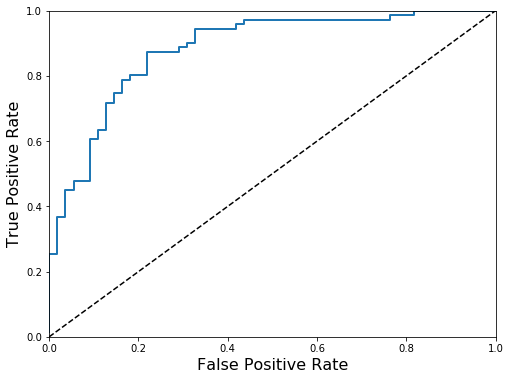

In [14]:
y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=3,
                             method="decision_function")
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.88245838668373877

Based off of the information above we have concluded that happiness is dependent upon health and wealth in a country.  We also found that we are able to predict happiness based off of these factors with an accuracy of 89%.  

## 5.) Health Score 

In [16]:
health["healthy_countries"] = (health["Life expectancy "] > 72)
health = health[(health['Year'] == 2015)]
health.to_csv("health.csv", index=False)
health = pd.read_csv("health.csv")
health.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,healthy_countries
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False
1,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,True
2,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,True
3,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,False
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,True


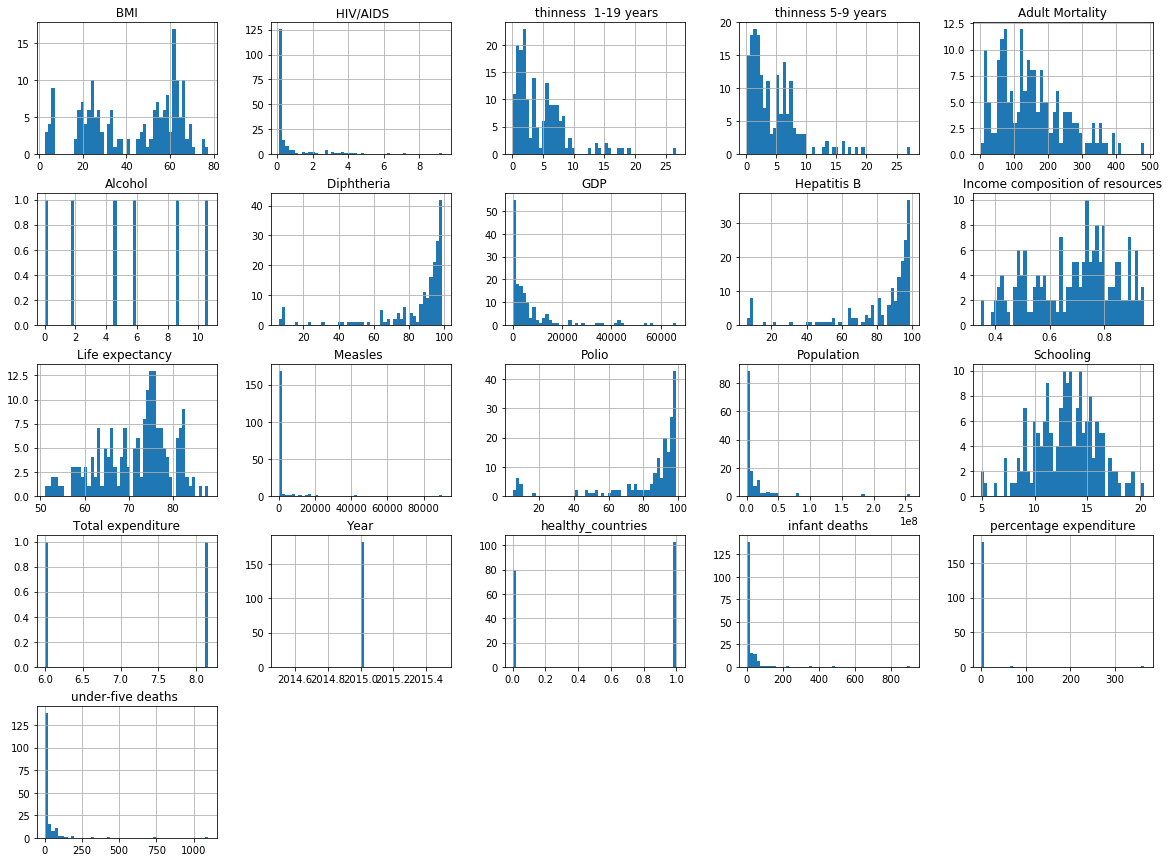

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
health.hist(bins=50, figsize=(20,15))
plt.show()

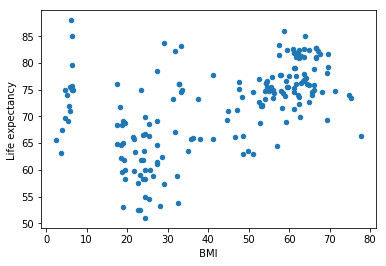

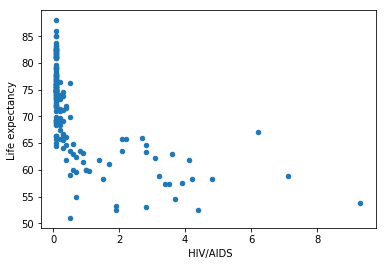

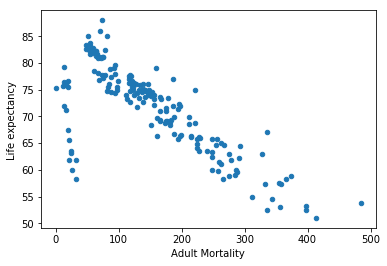

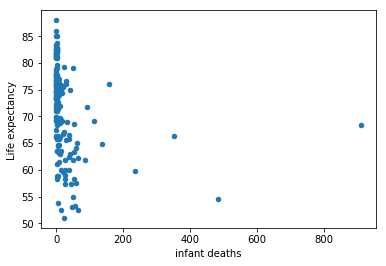

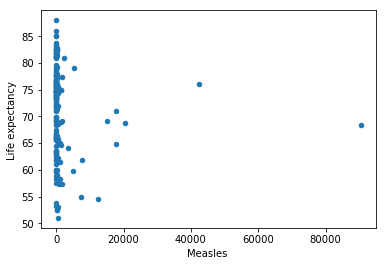

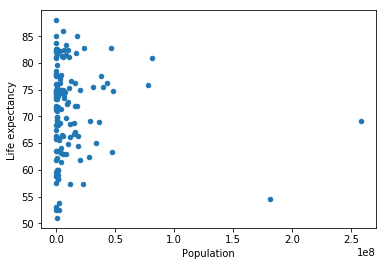

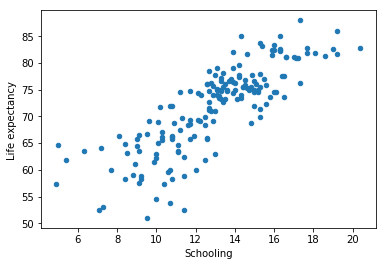

In [18]:
health.plot(kind="scatter", x=" BMI ", y="Life expectancy ")
health.plot(kind="scatter", x=" HIV/AIDS", y="Life expectancy ")
health.plot(kind="scatter", x="Adult Mortality", y="Life expectancy ")
health.plot(kind="scatter", x="infant deaths", y="Life expectancy ")
health.plot(kind="scatter", x="Measles ", y="Life expectancy ")
health.plot(kind="scatter", x="Population", y="Life expectancy ")
health.plot(kind="scatter", x="Schooling", y="Life expectancy ")

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Schooling", " HIV/AIDS", "Adult Mortality", " BMI "])),
        ("imputer", Imputer(strategy="median")),
    ])
X = num_pipeline.fit_transform(health)
X

array([[  1.01000000e+01,   1.00000000e-01,   2.63000000e+02,
          1.91000000e+01],
       [  1.42000000e+01,   1.00000000e-01,   7.40000000e+01,
          5.80000000e+01],
       [  1.44000000e+01,   1.00000000e-01,   1.90000000e+01,
          5.95000000e+01],
       [  1.14000000e+01,   1.90000000e+00,   3.35000000e+02,
          2.33000000e+01],
       [  1.39000000e+01,   2.00000000e-01,   1.30000000e+01,
          4.77000000e+01],
       [  1.73000000e+01,   1.00000000e-01,   1.16000000e+02,
          6.28000000e+01],
       [  1.27000000e+01,   1.00000000e-01,   1.18000000e+02,
          5.49000000e+01],
       [  2.04000000e+01,   1.00000000e-01,   5.90000000e+01,
          6.66000000e+01],
       [  1.59000000e+01,   1.00000000e-01,   6.50000000e+01,
          5.76000000e+01],
       [  1.27000000e+01,   1.00000000e-01,   1.18000000e+02,
          5.25000000e+01],
       [  1.26000000e+01,   1.00000000e-01,   1.47000000e+02,
          6.45000000e+01],
       [  1.45000000e

In [20]:
from sklearn.svm import SVC

y = health["healthy_countries"]

healthy_or_not = (y == 0) | (y == 1)
X = X[healthy_or_not]
y = y[healthy_or_not]

# SVM Classifier model
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

y = health.healthy_countries

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print (X_train.shape)
print(X_test.shape)

(146, 4)
(37, 4)


In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[56,  9],
       [ 2, 79]])

In [25]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.89772727272727271

In [26]:
recall_score(y_train, y_train_pred)

0.97530864197530864

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.93491124260355019

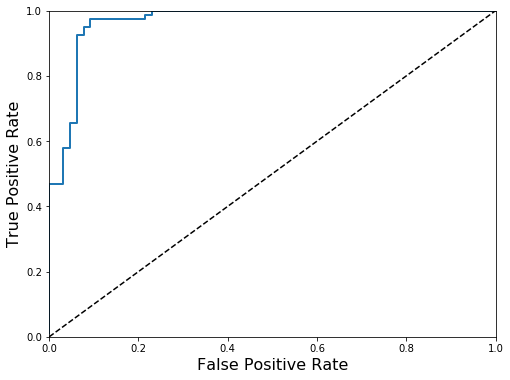

In [28]:
y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=3,
                             method="decision_function")
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.96676163342830002

The calculated information provides a strong relationship between a countries life expectancy and its adult mortality rate, BMI, HIV/AIDS population and its schooling. Predictions credited to its idea of health based off of this model reaches a ROC score of 96.7%.

## 6.) Wealth Score

In [30]:
wealth["Wealthy_Countries"] = (wealth["Economy (GDP per Capita)"] >= 1)
wealth.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Wealthy_Countries
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,True
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,True
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,True
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,True
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,True


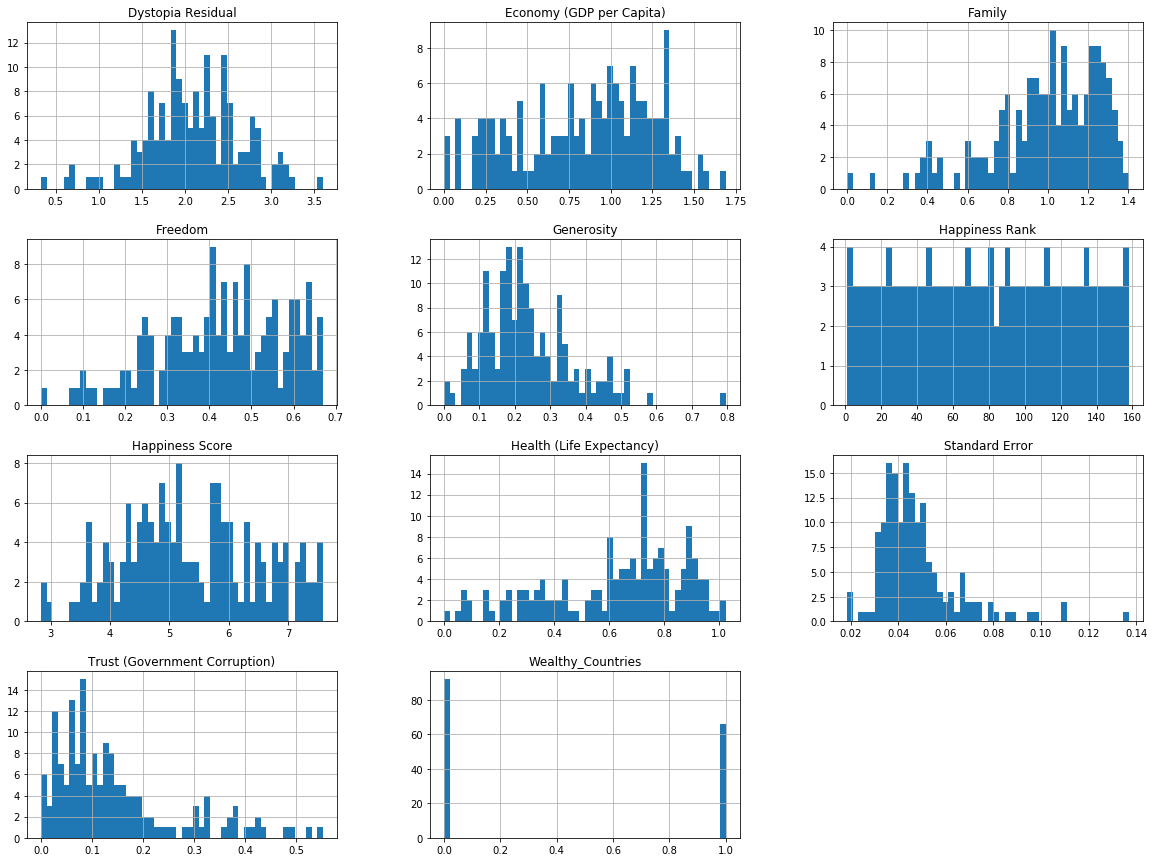

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
wealth.hist(bins=50, figsize=(20,15))
plt.show()

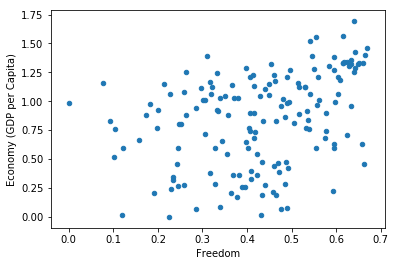

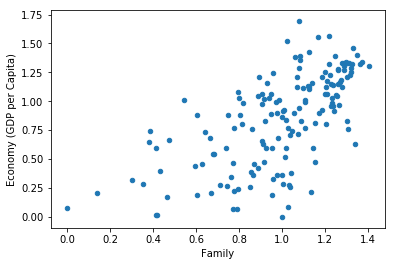

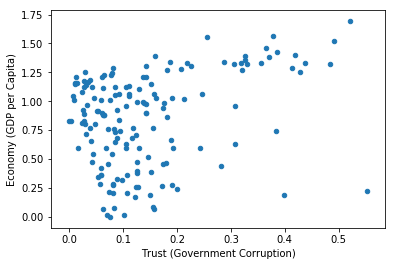

In [32]:
wealth.plot(kind="scatter", x="Freedom", y="Economy (GDP per Capita)")
wealth.plot(kind="scatter", x="Family", y="Economy (GDP per Capita)")
wealth.plot(kind="scatter", x="Trust (Government Corruption)", y="Economy (GDP per Capita)")

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Freedom", "Family", "Trust (Government Corruption)"])),
        ("imputer", Imputer(strategy="median")),
    ])
X = num_pipeline.fit_transform(happiness)
X

array([[ 0.66557,  1.34951,  0.41978],
       [ 0.62877,  1.40223,  0.14145],
       [ 0.64938,  1.36058,  0.48357],
       [ 0.66973,  1.33095,  0.36503],
       [ 0.63297,  1.32261,  0.32957],
       [ 0.64169,  1.31826,  0.41372],
       [ 0.61576,  1.28017,  0.31814],
       [ 0.6598 ,  1.28907,  0.43844],
       [ 0.63938,  1.31967,  0.42922],
       [ 0.65124,  1.30923,  0.35637],
       [ 0.41319,  1.22393,  0.07785],
       [ 0.63376,  1.23788,  0.10583],
       [ 0.62433,  1.29704,  0.18676],
       [ 0.48181,  0.91451,  0.21312],
       [ 0.54604,  1.24711,  0.1589 ],
       [ 0.49049,  1.23287,  0.17521],
       [ 0.61583,  1.21963,  0.37798],
       [ 0.61777,  1.36948,  0.28703],
       [ 0.5845 ,  1.28566,  0.2254 ],
       [ 0.64157,  1.12575,  0.38583],
       [ 0.59625,  1.28548,  0.32067],
       [ 0.63274,  1.08182,  0.32524],
       [ 0.42908,  1.25596,  0.11069],
       [ 0.54252,  1.02   ,  0.4921 ],
       [ 0.5421 ,  1.1985 ,  0.0927 ],
       [ 0.61477,  1.2993

In [34]:
from sklearn.svm import SVC

y = wealth["Wealthy_Countries"]

Wealthy_or_not = (y == 0) | (y == 1)
X = X[Wealthy_or_not]
y = y[Wealthy_or_not]

# SVM Classifier model
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

y = wealth.Wealthy_Countries

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print (X_train.shape)
print(X_test.shape)

(126, 3)
(32, 3)


In [37]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[60, 14],
       [17, 35]])

In [39]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.7142857142857143

In [40]:
recall_score(y_train, y_train_pred)

0.67307692307692313

In [41]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.69306930693069324

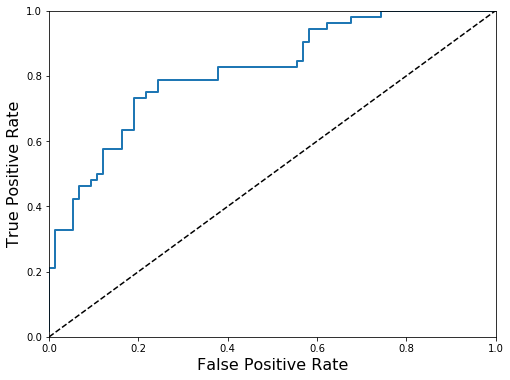

In [42]:
y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=3,
                             method="decision_function")
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.81678794178794178

Interestingly the calculated information provides a strong relationship between a countries Freedom, Family, and Trust (in government) with it's output of GDP. Predictions credited to this idea of wealth based off of this model reaches a ROC score of 81.7%.

## 7.) Adding Welfare Score To Kiva's Dataset

In [57]:
import numpy as np
from scipy.stats import norm

happiness = pd.read_csv("2015.csv")
wealth = happiness["Economy (GDP per Capita)"].values
mu, std = norm.fit(wealth)
for x in range(0,158):
    wealth[x] = wealth[x]*std*20
happiness["health"] = happiness["Health (Life Expectancy)"]*10
happiness["wealth"] = wealth
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,health,wealth
0,Switzerland,Western Europe,1,7.587,0.03411,11.223557,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,9.4143,11.223557
1,Iceland,Western Europe,2,7.561,0.04884,10.466565,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,9.4784,10.466565
2,Denmark,Western Europe,3,7.527,0.03328,10.652699,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,8.7464,10.652699
3,Norway,Western Europe,4,7.522,0.03880,11.725780,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,8.8521,11.725780
4,Canada,North America,5,7.427,0.03553,10.659209,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,9.0563,10.659209


In [45]:
kiva = kiva.dropna()
kiva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423081 entries, 2 to 671141
Data columns (total 20 columns):
id                    423081 non-null int64
funded_amount         423081 non-null float64
loan_amount           423081 non-null float64
activity              423081 non-null object
sector                423081 non-null object
use                   423081 non-null object
country_code          423081 non-null object
country               423081 non-null object
region                423081 non-null object
currency              423081 non-null object
partner_id            423081 non-null float64
posted_time           423081 non-null object
disbursed_time        423081 non-null object
funded_time           423081 non-null object
term_in_months        423081 non-null float64
lender_count          423081 non-null int64
tags                  423081 non-null object
borrower_genders      423081 non-null object
repayment_interval    423081 non-null object
date                  423081 non

In [46]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 14 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
health                           158 non-null float64
wealth                           158 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 17.4+ KB


In [47]:
kiva["happiness"] = 0.000
kiva["wealth"] = 0.000
kiva["health"] = 0.000
kiva_country = kiva["country"].values
happiness_country = happiness["Country"].values
kiva_happiness = kiva["happiness"].values
kiva_wealth = kiva["wealth"].values
kiva_health = kiva["health"].values
happiness_score = happiness["Happiness Score"]
wealth_score = happiness["Economy (GDP per Capita)"]
health_score = happiness["health"]
kiva.to_csv("kiva.csv", index=False)
kiva = pd.read_csv("kiva.csv")
kiva.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,happiness,wealth,health
0,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,0.0,0.0,0.0
1,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,0.0,0.0,0.0
2,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,0.0,0.0,0.0
3,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01,0.0,0.0,0.0
4,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,...,2014-01-08 00:35:14+00:00,14.0,16,"#Repeat Borrower, #Woman Owned Biz",female,monthly,2014-01-01,0.0,0.0,0.0


In [48]:
for x in range (0, 423081):
    for i in range (0, 158):
        if kiva_country[x] == happiness_country[i]:
            kiva_happiness[x] = happiness_score[i]
            kiva_wealth[x] = wealth_score[i]
            kiva_health[x] = health_score[i]

In [49]:
kiva["happiness"] = kiva_happiness
kiva["wealth"] = kiva_wealth
kiva["health"] = kiva_health
kiva["welfare"] = (kiva["happiness"]+kiva["wealth"]+kiva["health"])/3

In [50]:
kiva

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,happiness,wealth,health,welfare
0,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,4.565,5.183695,5.1529,4.967198
1,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,4.565,5.183695,5.1529,4.967198
2,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,5.194,4.785388,5.1466,5.041996
3,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,14.0,19,user_favorite,female,monthly,2014-01-01,5.194,4.785388,5.1466,5.041996
4,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,...,14.0,16,"#Repeat Borrower, #Woman Owned Biz",female,monthly,2014-01-01,5.194,4.785388,5.1466,5.041996
5,653075,225.0,225.0,Poultry,Agriculture,to expand her existing poultry farm business.,IN,India,Dhupguri,INR,...,43.0,7,user_favorite,female,bullet,2014-01-01,4.565,5.183695,5.1529,4.967198
6,653091,400.0,400.0,General Store,Retail,"to buy packs of salts, biscuits and beverages.",PK,Pakistan,Faisalabad,PKR,...,14.0,11,"#Woman Owned Biz, #Parent",female,monthly,2014-01-01,5.194,4.785388,5.1466,5.041996
7,653066,250.0,250.0,Sewing,Services,to purchase a sewing machine.,IN,India,Maynaguri,INR,...,43.0,4,"user_favorite, user_favorite",female,bullet,2014-01-01,4.565,5.183695,5.1529,4.967198
8,653080,475.0,475.0,Beauty Salon,Services,to buy more cosmetics products for her beauty ...,PK,Pakistan,Lahore,PKR,...,14.0,18,#Woman Owned Biz,female,monthly,2014-01-01,5.194,4.785388,5.1466,5.041996
9,653069,250.0,250.0,Construction Supplies,Construction,to purchase stones for starting a business sup...,IN,India,Maynaguri,INR,...,43.0,10,"user_favorite, user_favorite",female,bullet,2014-01-01,4.565,5.183695,5.1529,4.967198


We have now successfully added happiness, wealth, health, and our calculated welfare score to the Kiva dataset by country. 

## 8.) Planning For The Future

Our unique approach to calculating welfare scores, by first creating three independent machine learning models based on health, wealth, and happiness allowed us to provide a very robust solution for Kiva. 

Out of all of our models, our health model performed best. We think there is still room for improvement for both our wealth and happiness models though. In the future we plan on aggregating more data to our wealth and happiness dataset, as well as fine tune all of our models.

Unfortunately the level of granularity achieved for our solution was on a country to country bases. To achieve a higher level of granularity we wil have to find better datasets that match up with Kiva's region by region feature. 

All in all I think we produced a very good solution, as well as leaving the door open to create much more accurate welfare scores that Kiva can then use to assess borrower levels. 